# Work.ipynb: Ingest the Mt. Rainier (Paradise) annual snow total and make a plot

### Todd MItchell, September 2023

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.interactive(True)
# You need the following line, '%matplotlib inline', to display figures in
# jupyter notebooks.  You get an error message if you omit it and try to
# plot a figure.
# %matplotlib  inline 

import sys
sys.path.insert( 0, '/Users/mitchell/Documents/PYTHON/modules/mitchell/' )
import tpm
dir( tpm ) # tells you what functions are in the module

import pandas as pd
pd.set_option( 'display.max_rows', None )

In [2]:
dir(tpm)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'anomalies',
 'arclength',
 'fill_year',
 'find_latlon',
 'plot_vertical_lines',
 'space_longitudes',
 'threetotwo',
 'time_shift',
 'write_ts',
 'yearsmonths',
 'yearsmonthsdays']

In [3]:
!ls -lt

total 432
-rw-r--r--@ 1 mitchell  staff   1108 Sep 20 23:19 snowmtrainierjulytojunetotal19212023.csv
-rw-r--r--@ 1 mitchell  staff  32248 Aug 18  2022 work.ipynb
-rw-r--r--@ 1 mitchell  staff  80861 Aug 17  2022 snowmtrainierjulytojunetotal19212022.png
-rw-r--r--@ 1 mitchell  staff  74921 Aug 17  2022 snowmtrainierjulytojunetotal19212021.png
-rw-r--r--@ 1 mitchell  staff   1097 Aug 17  2022 snowmtrainierjulytojunetotal19212022.csv~
-rw-r--r--@ 1 mitchell  staff   1463 Aug 17  2022 snowmtrainierann19212022
-rw-r--r--  1 mitchell  staff    300 Feb 20  2022 README
-rw-r--r--@ 1 mitchell  staff   1086 Feb 20  2022 snowmtrainierjulytojunetotal19212021.csv
-rw-r--r--  1 mitchell  staff    161 Feb 18  2022 README~
-rw-r--r--@ 1 mitchell  staff   1449 Feb 18  2022 snowmtrainierann19212021~


In [8]:
with open( 'snowmtrainierjulytojunetotal19212023.csv', 'r' ) as f:
    a = f.readlines()

In [9]:
a

['Year,Total (in)\n',
 '1921,671.0\n',
 '1922,723.0\n',
 '1923,565.0\n',
 '1924,551.0\n',
 '1925,674.0\n',
 '1926,373.0\n',
 '1927,588.0\n',
 '1928,405.0\n',
 '1929,554.0\n',
 '1930,390.0\n',
 '1931,444.0\n',
 '1932,751.0\n',
 '1933,624.0\n',
 '1934,316.0\n',
 '1935,543.0\n',
 '1936,605.0\n',
 '1937,693.0\n',
 '1938,511.0\n',
 '1939,573.0\n',
 '1940,313.0\n',
 '1941,529.0\n',
 '1942,446.0\n',
 '1943,529.0\n',
 '1944,\n',
 '1945,\n',
 '1946,\n',
 '1947,529.0\n',
 '1948,661.0\n',
 '1949,\n',
 '1950,\n',
 '1951,\n',
 '1952,\n',
 '1953,\n',
 '1954,\n',
 '1955,788.0\n',
 '1956,1000.0\n',
 '1957,619.0\n',
 '1958,602.0\n',
 '1959,646.0\n',
 '1960,564.0\n',
 '1961,685.0\n',
 '1962,545.0\n',
 '1963,452.0\n',
 '1964,429.0\n',
 '1965,538.0\n',
 '1966,583.0\n',
 '1967,692.0\n',
 '1968,502.0\n',
 '1969,829.0\n',
 '1970,649.0\n',
 '1971,884.0\n',
 '1972,1122.0\n',
 '1973,577.0\n',
 '1974,1070.0\n',
 '1975,820.0\n',
 '1976,858.0\n',
 '1977,414.0\n',
 '1978,598.0\n',
 '1979,583.0\n',
 '1980,645.0\n',


In [10]:
# Delete the first 2 lines of metadata
a = a[2:]
len(a)

102

In [36]:
# Write the data in a dataframe
data = []
for icnt, line in enumerate( a ):
    syear, svalue = line.strip('\n').split(',')
    year = int(syear)
    value = np.nan
    if svalue!='':
        value = float(svalue)
    data.append( [ year, value ] )
df = pd.DataFrame(data, columns=['Year', 'Total (in)' ] )
df.loc[df['Year']>=1948,:]

,Year,Total (in)
26,1948,661.0
27,1949,NaN
28,1950,NaN
29,1951,NaN
30,1952,NaN
31,1953,NaN
32,1954,NaN
33,1955,788.0
34,1956,1000.0
35,1957,619.0


In [37]:
df.to_csv( 'snowmtrainierjulytojunetotal19212023.csv', index=False )

In [38]:
# Identify the years with no data
df.loc[np.where( np.isnan(df['Total (in)']) )[0],'Year']

22    1944
23    1945
24    1946
27    1949
28    1950
29    1951
30    1952
31    1953
32    1954
Name: Year, dtype: int64

/var/folders/3v/jw596p4x0z9g2v5swhn_2vzm0000gn/T/ipykernel_37086/2102894820.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot( (1920,2025), (meanval,meanval), 'k:', color=(0.7,0.7,0.7) )


<Figure size 640x480 with 0 Axes>

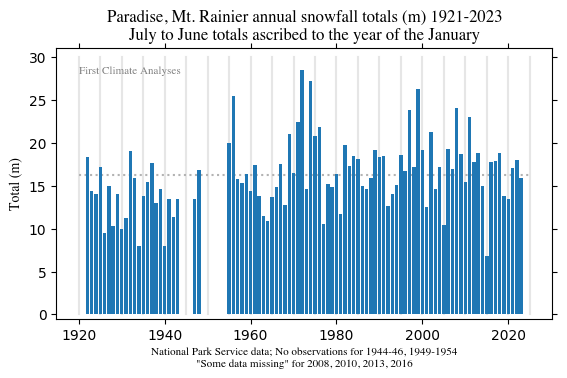

In [90]:
# Make a plot
meanval = np.nanmean(df['Total (in)'])*2.54/100
plt.clf()
fig, ax = plt.subplots()
plt.bar( df['Year'], df['Total (in)']*2.54/100, zorder=10 )
ax.set_aspect(2)   # Set the aspect ratio
plt.gca().set_ylim( ( -0.5, 31 ))
ax.tick_params(right=True, top=True )
plt.title( r'Paradise, Mt. Rainier annual snowfall totals (m) 1921-2023' '\n'
           r'July to June totals ascribed to the year of the January', \
         fontname='Times' )
plt.ylabel( 'Total (m)', fontname='Times' )
tpm.plot_vertical_lines( np.arange( 1920, 2030, 5 ), ( 0, 30 ), zorder=0 )
plt.plot( (1920,2025), (meanval,meanval), 'k:', color=(0.7,0.7,0.7) )
plt.text( np.mean( plt.gca().get_xlim() ), -6, \
    r'National Park Service data; No observations for 1944-46, 1949-1954' '\n'
     r'"Some data missing" for 2008, 2010, 2013, 2016', \
         fontsize=8, fontname='Times', ha='center' )
plt.text( 1920, 28, 'First Climate Analyses', fontsize=8, \
         color='gray', fontname='Times' )  
plt.savefig( 'snowmtrainierjulytojunetotal19212023.png', dpi=450, \
    bbox_inches='tight' )
plt.show()
!open snowmtrainierjulytojunetotal19212023.png

In [78]:
np.nanmean(df['Total (in)'])*2.54/100, np.nanmean(df.loc[df['Year']<=1948,'Total (in)'])*2.54/100

(16.245211827956993, 13.641916666666669)

In [73]:
# df.loc[df['Year']>=1955,'Total (in)']
# df.loc[df['Year']<=1948,'Total (in)']
df.loc[df['Year']<=1948]

,Year,Total (in)
0,1922,723.0
1,1923,565.0
2,1924,551.0
3,1925,674.0
4,1926,373.0
5,1927,588.0
6,1928,405.0
7,1929,554.0
8,1930,390.0
9,1931,444.0
